# Exercise 3: Multi-Node Greeter
Create a state machine that will greet the user, tell their age and list their skills. Eg.
If user name is "Ata", age is 25 and skills are Python, Machine Learning and LangGraph, the final output should print "Ata, welcome to the system! You are 25 years old! You have skills in: Python, Machine Learning, and LangGraph."
Greeting, age statement and skills strings should be added in different nodes to the final output.

In [8]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [9]:
class AgentState(TypedDict):
    name: str
    age: int
    skills: List[str]
    result: str

In [10]:
def greeting_node(state: AgentState) -> AgentState:
    """
    This node greets the user.
    """
    state['result'] = f"{state['name']}, welcome to the system!"
    return state

def age_node(state: AgentState) -> AgentState:
    """
    This node states user's age.
    """
    state['result'] = f"{state['result']} You are {state['age']} years old!"
    return state

def skills_node(state: AgentState) -> AgentState:
    """
    This node lists user's skills.
    """
    skills_string = "You have skills in: "
    skills = state['skills']
    for i, v in enumerate(skills):
        if (i == len(skills)-1):
            skills_string += f"and {v}."
        else:
            skills_string += f"{v}, "
    state['result'] = f"{state['result']} {skills_string}"
    return state

In [11]:
graph = StateGraph(AgentState)
graph.add_node(greeting_node.__name__, greeting_node)
graph.add_node(age_node.__name__, age_node)
graph.add_node(skills_node.__name__, skills_node)
graph.add_edge(greeting_node.__name__, age_node.__name__)
graph.add_edge(age_node.__name__, skills_node.__name__)
graph.set_entry_point(greeting_node.__name__)
graph.set_finish_point(skills_node.__name__)
app = graph.compile()

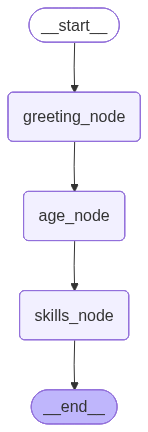

In [12]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [13]:
initial_state: AgentState = {
    'name': 'Ata',
    'age': 25,
    'skills': ['Python', 'Machine Learning', 'LangGraph']
}
final_state: AgentState = app.invoke(initial_state)
print(final_state['result'])

Ata, welcome to the system! You are 25 years old! You have skills in: Python, Machine Learning, and LangGraph.
